# SYRIATEL CUSTOMER CHURN CLASSIFICATION PROJECT

## BUSINESS UNDERSTANDING

### Project Overview
The objective of this project is to build a classifier that predicts whether a customer will "soon" stop doing business with SyriaTel, a telecommunications company.
This is a binary classification problem, where the model will predict customer churn based on various features. By analyzing historical customer data, we aim to uncover patterns and factors that are indicative of customer churn. This will enable SyriaTel to take proactive measures to retain customers and reduce potential revenue loss.
Churn prediction is crucial for the company to implement retention strategies and improve customer satisfaction.


### Business Problem
**Objective**: Predict whether a customer will churn ("soon" stop doing business with SyriaTel). 

**Importance**: Understanding customer churn is critical for SyriaTel to minimize revenue loss and enhance customer loyalty. By identifying the patterns and factors that lead to churn, SyriaTel can implement targeted retention strategies, improve overall customer satisfaction, and reduce the financial impact of losing customers. The core question to address is: Are there predictable patterns in the customer data that can help in identifying customers at risk of churning, and how can these insights be used to retain them?

### Stakeholders
- **Primary Stakeholder**: SyriaTel, a telecommunications company interested in reducing customer churn and improving customer retention.
- **Secondary Stakeholders**:
  - **Customer Service Teams**: To develop strategies and interventions for retaining customers identified as high risk.
  - **Marketing Teams**: To create targeted campaigns and offers aimed at at-risk customers.
  - **Financial Analysts**: To evaluate the financial impact of customer churn and measure the effectiveness of retention strategies.

## DATA UNDERSTANDING

### Data Overview
- The dataset used in this project is the SyriaTel Customer Churn dataset. This dataset includes customer information and their usage patterns with SyriaTel. The goal is to build a classifier to predict customer churn based on these features.
- The target variable, churn, is a binary categorical variable where:
`True`:indicates the customer churned 
`False`:indicates the customer did not churn.


### Data Sources and Collection
The dataset was collected through various customer interaction channels, including service usage logs, billing information, and customer service interactions. The collection methods include automated data capture from CRM systems and manual entries from customer service records.

### Data Description
The dataset contains the following features:
- `state`: State where the customer resides.Geographic factors might influence churn, especially if different regions have varying levels of service quality or pricing.
- `account length`: The length of the customer’s account.Longer account lengths might be associated with lower churn rates.
- `area code`: The area code of the customer's phone number
- `phone number`: Customer’s phone number
- `international plan`: Whether the customer has an international plan.The presence of this plan could affect churn rates based on its perceived value.
- `voice mail plan`: Whether the customer has a voice mail plan
- `number vmail messages`: Number of voice mail messages
- `total day minutes`: Total minutes of day calls
- `total day calls`: Total number of day calls
- `total day charge`: Total charge for day calls
- `total eve minutes`: Total minutes of evening calls
- `total eve calls`: Total number of evening calls
- `total eve charge`: Total charge for evening calls
- `total night minutes`: Total minutes of night calls
- `total night calls`: Total number of night calls
- `total night charge`: Total charge for night calls
- `total intl minutes`: Total minutes of international calls
- `total intl calls`: Total number of international calls
- `total intl charge`: Total charge for international calls
  These features quantify the amount of time spent on calls during different times of the day. Higher usage might indicate higher satisfaction or, conversely, higher bills, which could impact churn.
- `customer service calls`: Number of customer service calls.A high number of service calls might indicate issues that could lead to churn.
- `churn`: Target variable indicating whether the customer has churned (TRUE/FALSE)

### Data Exploration

In [108]:
# Import the relevant libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load the dataset
df = pd.read_csv('churn.csv')

In [109]:
# Display the first 10 rows of the dataset
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [110]:
# Display the last 10 rows of the dataset
df.tail(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3323,IN,117,415,362-5899,no,no,0,118.4,126,20.13,...,97,21.19,227.0,56,10.22,13.6,3,3.67,5,True
3324,WV,159,415,377-1164,no,no,0,169.8,114,28.87,...,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
3325,OH,78,408,368-8555,no,no,0,193.4,99,32.88,...,88,9.94,243.3,109,10.95,9.3,4,2.51,2,False
3326,OH,96,415,347-6812,no,no,0,106.6,128,18.12,...,87,24.21,178.9,92,8.05,14.9,7,4.02,1,False
3327,SC,79,415,348-3830,no,no,0,134.7,98,22.90,...,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [111]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [112]:
# Data types
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [113]:
# Summary statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### Distribution of the Target Variable

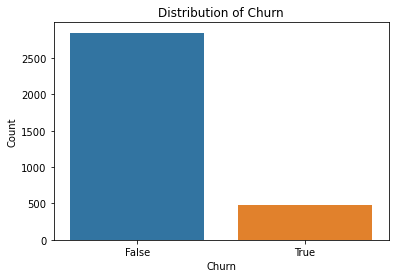

In [114]:
# Plot for Distribution of Churn to understand the proportion of customers who have churned vs those who haven't

sns.countplot(data=df, x='churn')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [115]:
# Analyze Correlation between features and the target variable

correlation_matrix = df.corr()
correlation_with_churn = correlation_matrix['churn'].sort_values(ascending=False)
correlation_with_churn

churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64

In [116]:
# Identify top 3 features that have the highest correlation with churn

top_3_features = correlation_matrix['churn'].abs().sort_values(ascending=False)[1:4]
print("Top 3 features that have the highest correlation with churn:\n", top_3_features)

Top 3 features that have the highest correlation with churn:
 customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
Name: churn, dtype: float64


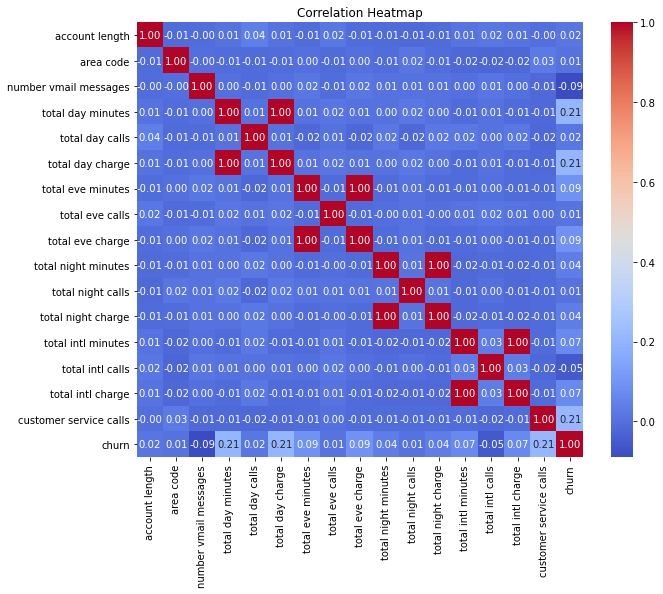

In [117]:
# Plot the heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Strongest Positive Correlations:
- customer service calls (0.209) feature shows the highest positive correlation with churn. More customer service calls are associated with a higher likelihood of churn.
- total day minutes (0.205) and total day charge (0.205) both have a notable positive correlation, suggesting that higher day usage is related to a higher probability of churn.
  
Weak Positive Correlations:
- total eve minutes (0.093) and total eve charge (0.093)features show a weaker positive correlation with churn.
- total intl minutes (0.068) and total intl charge (0.068) also have a weak positive correlation.
  
Weak Negative Correlations:
- total intl calls (-0.053) feature has a slight negative correlation with churn.
- number vmail messages (-0.090) feature also shows a small negative correlation.

No Significant Correlation:
- account length, total night minutes, total night charge, total day calls, area code, total night calls, total eve calls, and total intl calls show very weak correlations with churn.

#### Distribution of Key Features

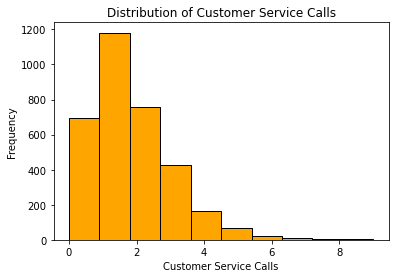

In [118]:
# Plot for Customer Service Calls

plt.hist(df['customer service calls'], bins=10, color='orange', edgecolor='black')
plt.title('Distribution of Customer Service Calls')
plt.xlabel('Customer Service Calls')
plt.ylabel('Frequency')
plt.show()

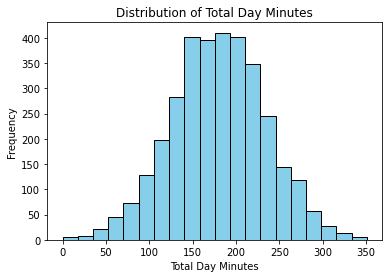

In [119]:
# Plot for Total Day Minutes

plt.hist(df['total day minutes'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Day Minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Frequency')
plt.show()

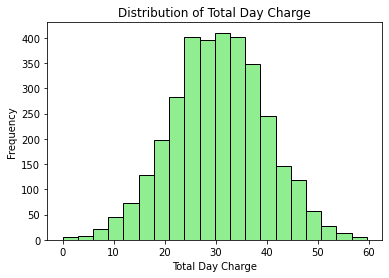

In [120]:
# Plot for Total Day Charge

plt.hist(df['total day charge'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Total Day Charge')
plt.xlabel('Total Day Charge')
plt.ylabel('Frequency')
plt.show()

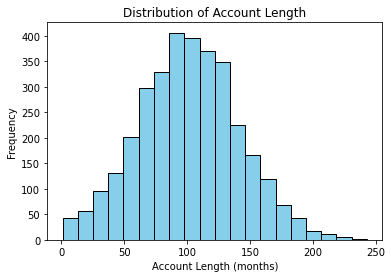

In [121]:
# Plot for the Distribution of Account Length

plt.hist(df['account length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Account Length')
plt.xlabel('Account Length (months)')
plt.ylabel('Frequency')
plt.show()

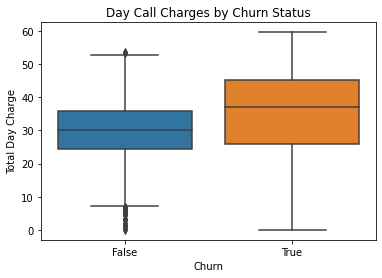

In [122]:
# Plot for day call charges by churn status

sns.boxplot(data=df, x='churn', y='total day charge')
plt.title('Day Call Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Total Day Charge')
plt.show()

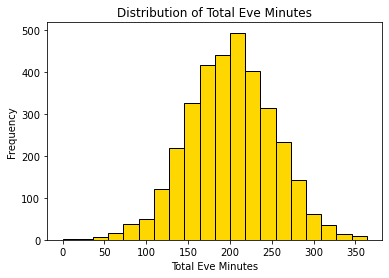

In [123]:
# Plot for Total Eve Minutes

plt.hist(df['total eve minutes'], bins=20, color='gold', edgecolor='black')
plt.title('Distribution of Total Eve Minutes')
plt.xlabel('Total Eve Minutes')
plt.ylabel('Frequency')
plt.show()


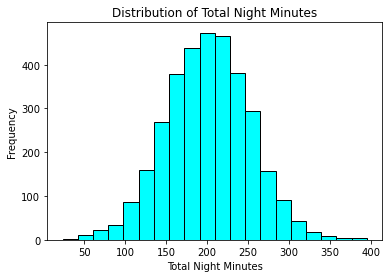

In [124]:
# Plot for Total Night Minutes

plt.hist(df['total night minutes'], bins=20, color='cyan', edgecolor='black')
plt.title('Distribution of Total Night Minutes')
plt.xlabel('Total Night Minutes')
plt.ylabel('Frequency')
plt.show()

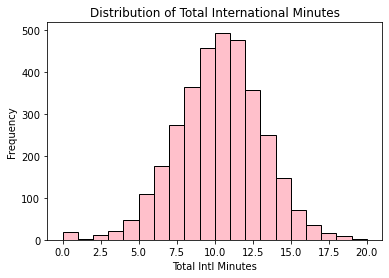

In [125]:
# Plot for Total Intl Minutes

plt.hist(df['total intl minutes'], bins=20, color='pink', edgecolor='black')
plt.title('Distribution of Total International Minutes')
plt.xlabel('Total Intl Minutes')
plt.ylabel('Frequency')
plt.show()

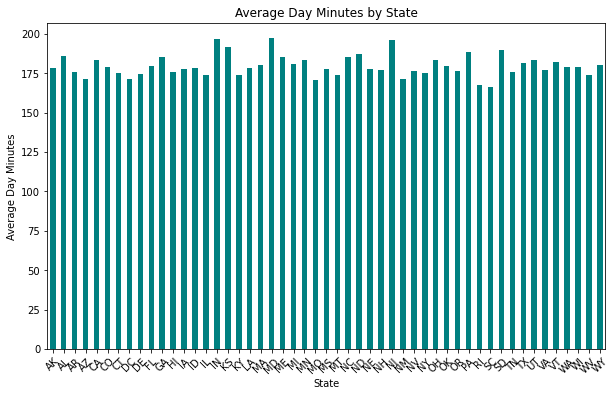

In [126]:
# Plot for average day minutes spent by customers in different states

state_day_minutes = df.groupby('state')['total day minutes'].mean()

plt.figure(figsize=(10, 6))
state_day_minutes.plot(kind='bar', color='teal')
plt.title('Average Day Minutes by State')
plt.xlabel('State')
plt.ylabel('Average Day Minutes')
plt.xticks(rotation=45)
plt.show()


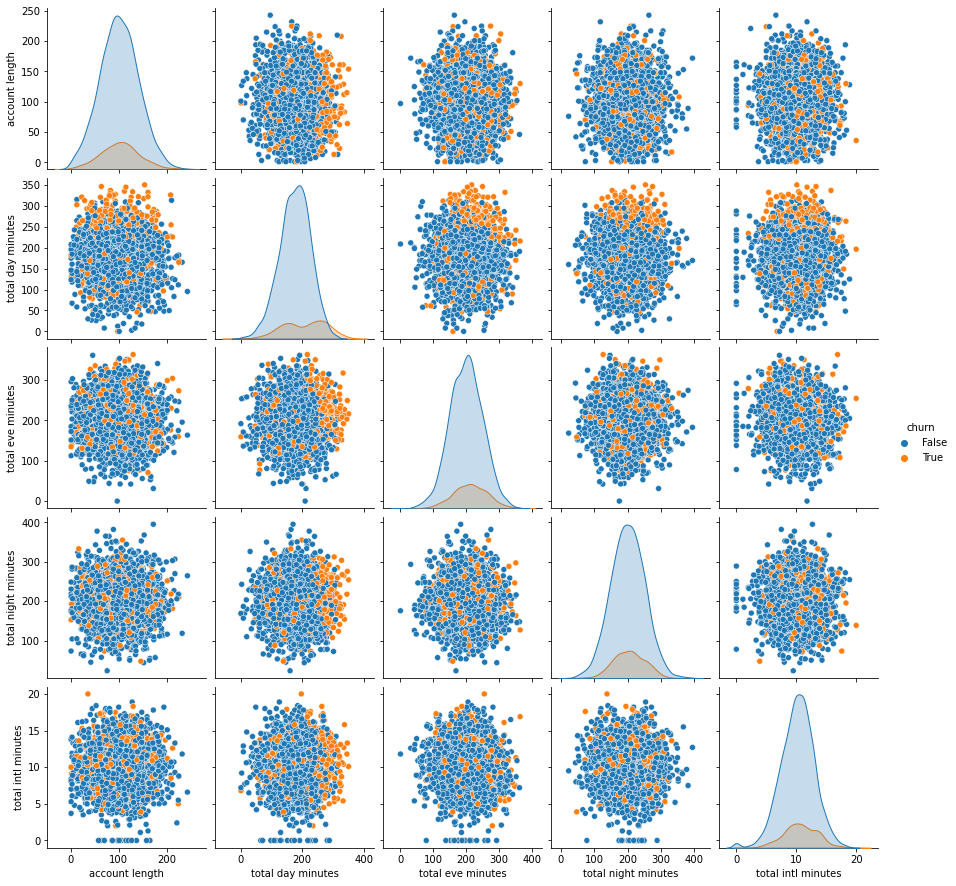

In [127]:
# Pair plot of selected features

# Select a subset of features for the pair plot
features = ['account length', 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'churn']

sns.pairplot(df[features], hue='churn')
plt.show()


#### Distribution of Numerical Features

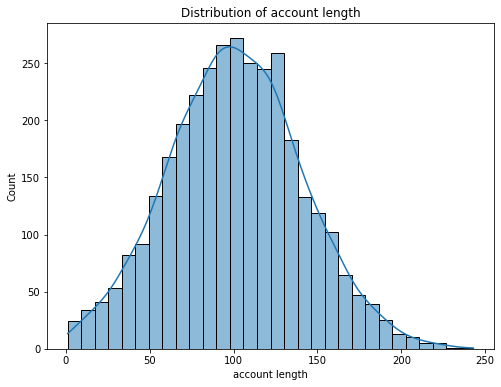

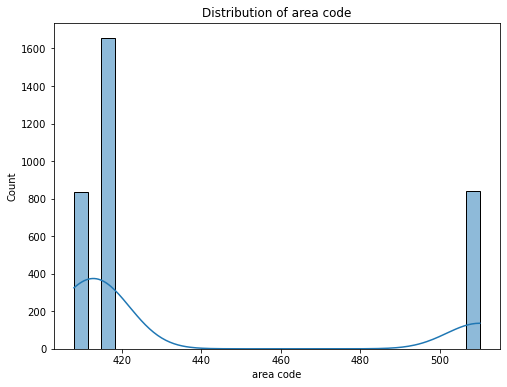

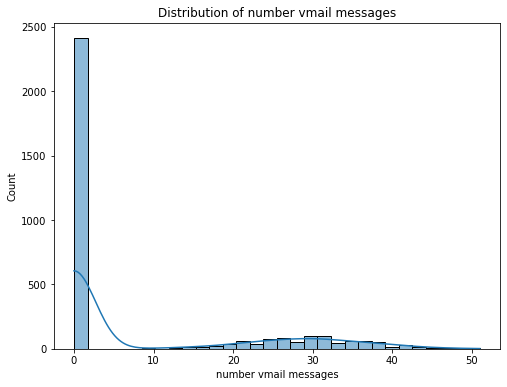

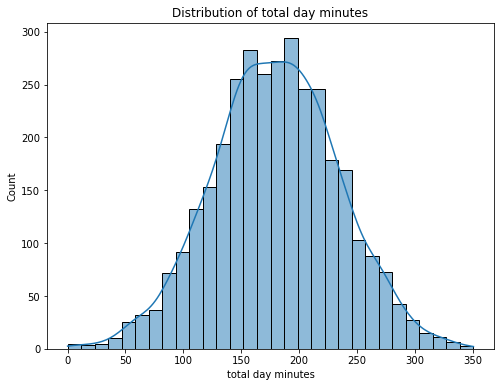

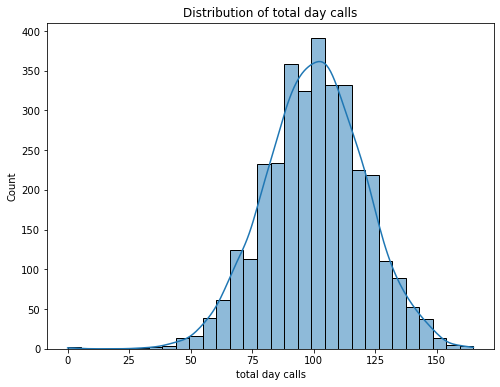

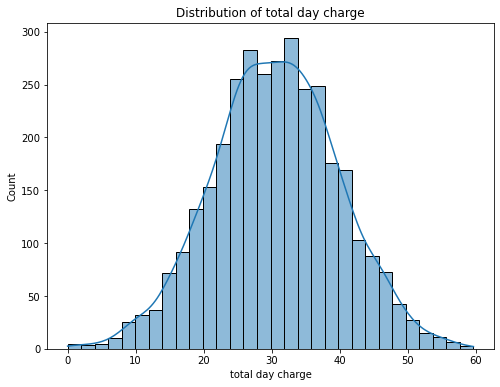

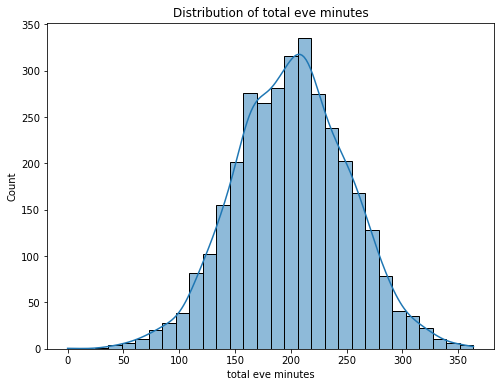

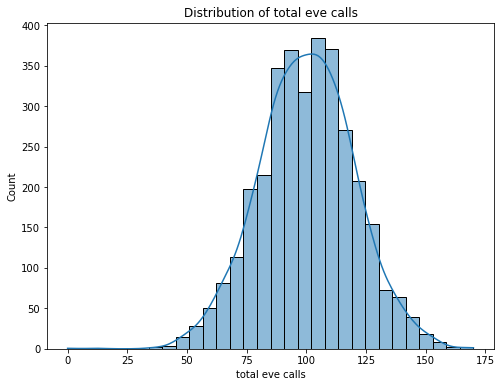

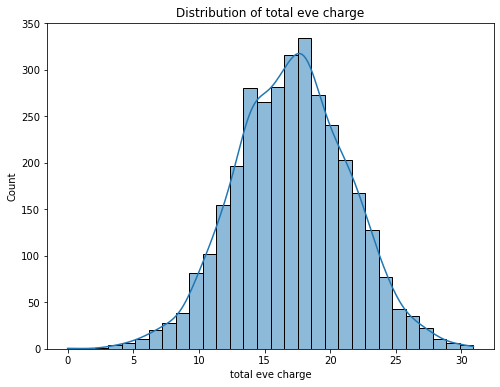

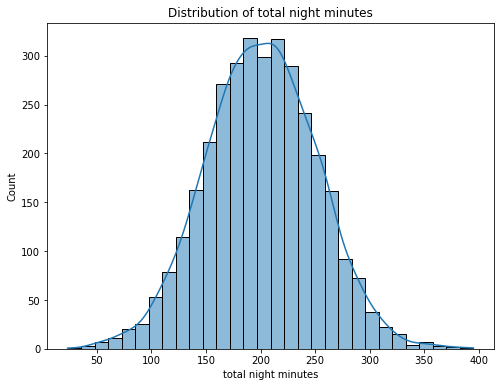

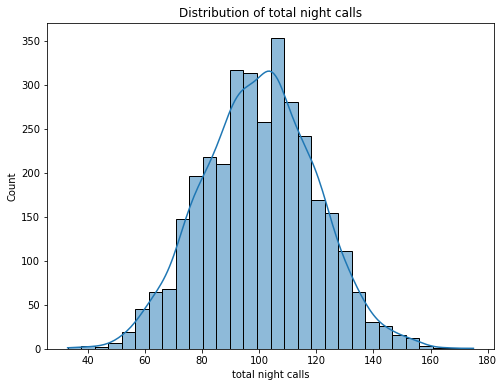

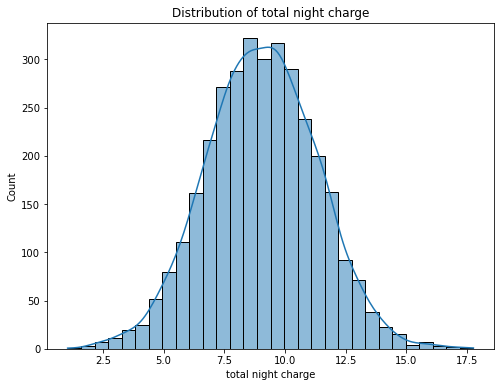

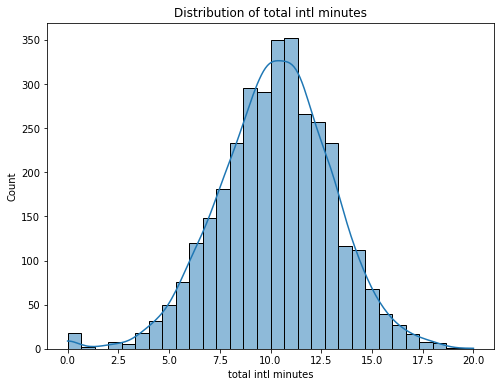

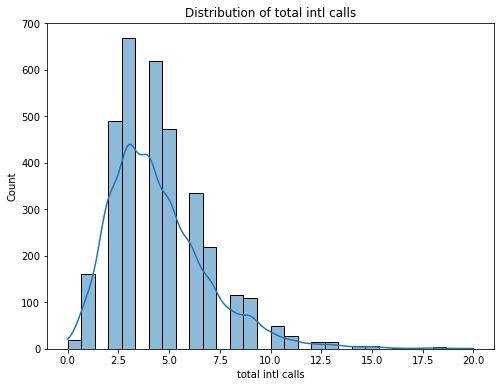

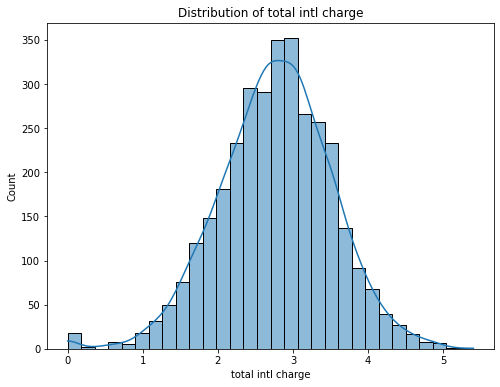

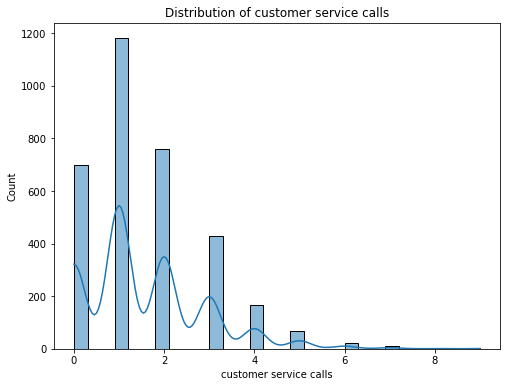

In [128]:
# Distribution of Numerical Features

df = df.drop(columns=['phone number'])
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


#### Distribution of Categorical Features

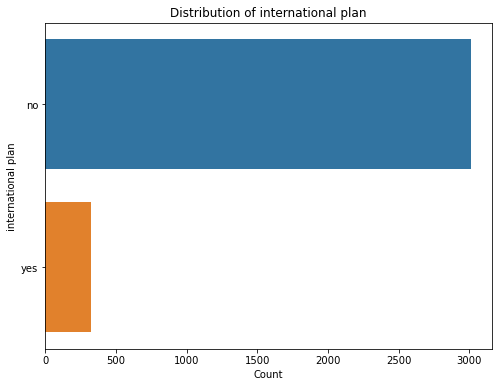

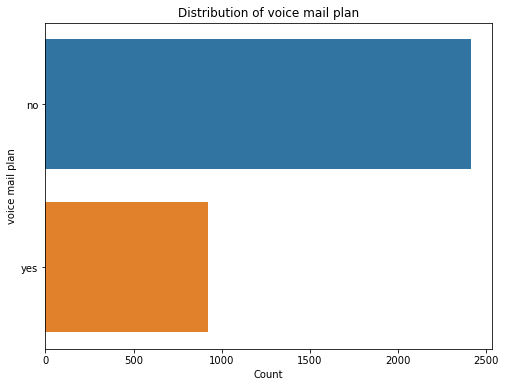

In [129]:
# Distribution of Categorical Features

df = df.drop(columns=['state'])
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=feature, data=df, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()


#### Feature Relationships with Target Variable

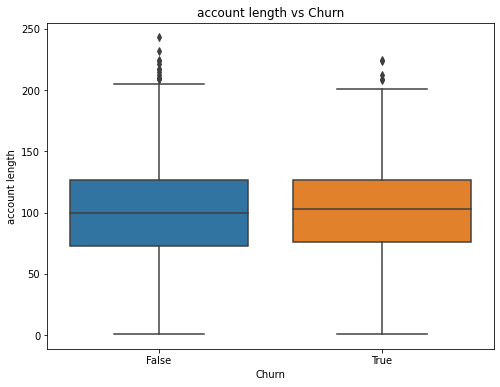

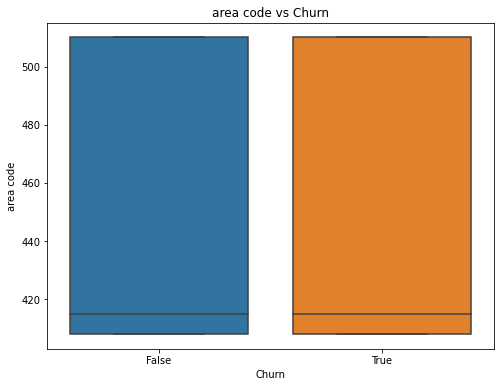

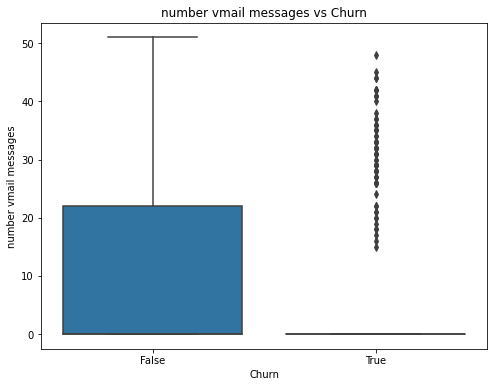

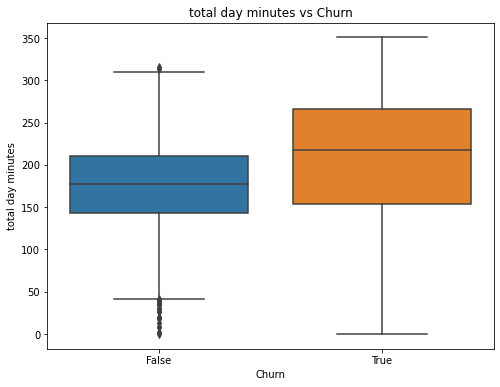

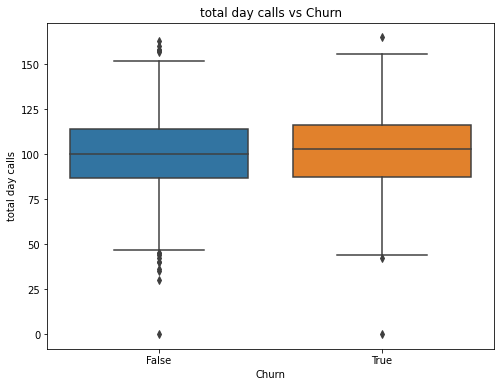

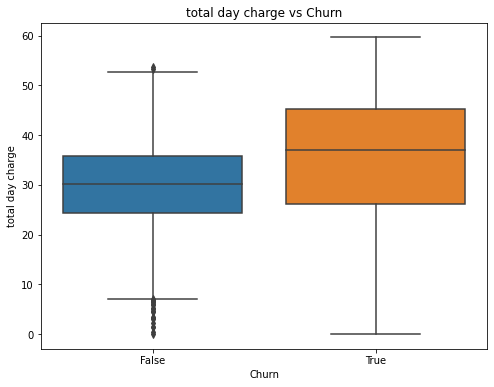

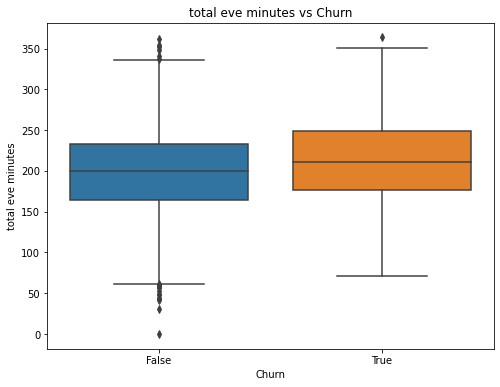

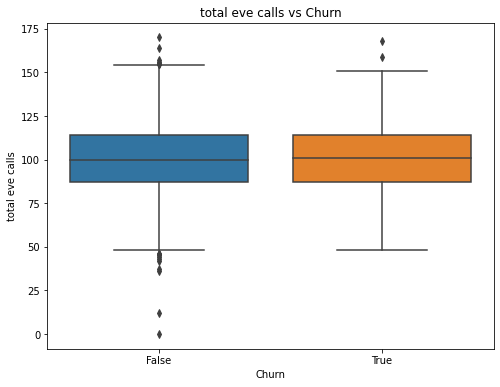

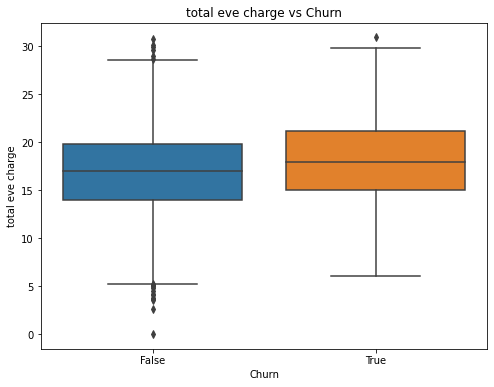

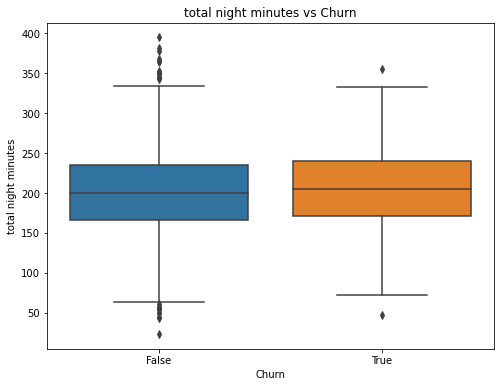

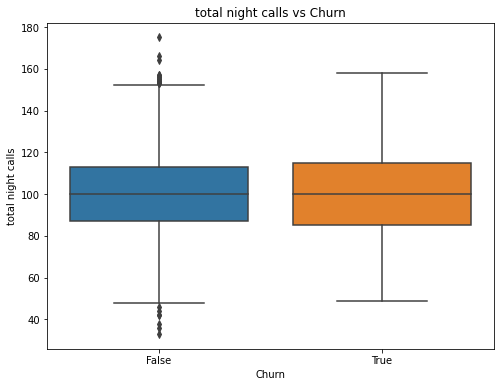

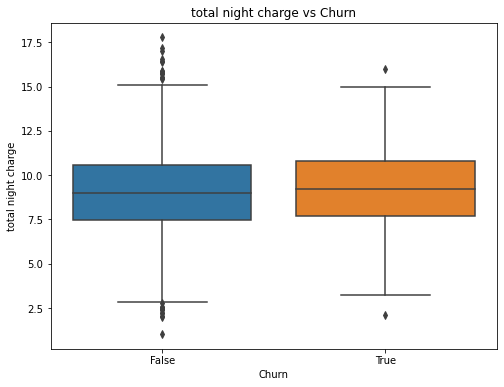

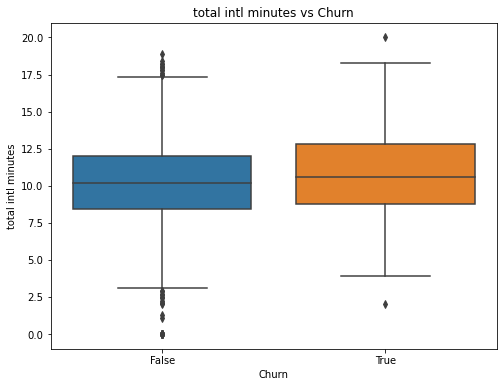

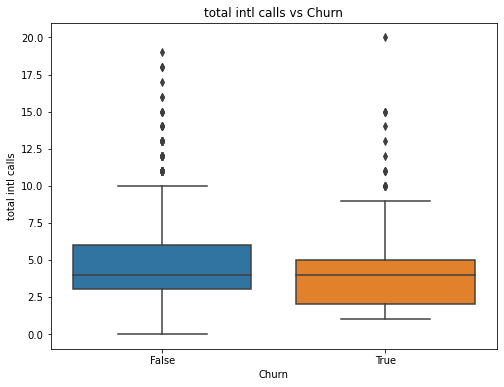

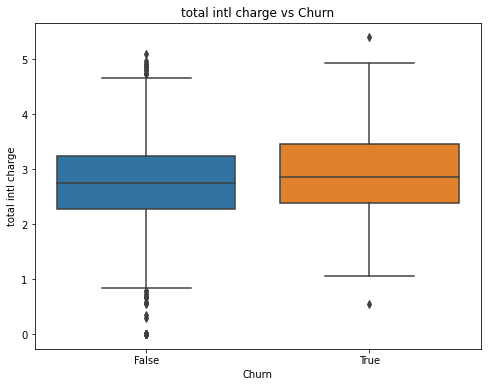

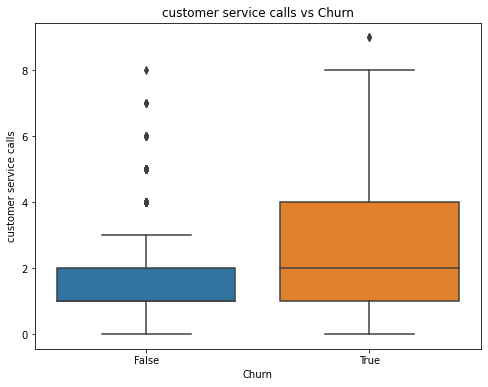

In [130]:
# Feature Relationships with Target Variable

# Plot numerical features vs. target variable
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='churn', y=feature, data=df)
    plt.title(f'{feature} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.show()


#### Class Imbalance Analysis in Categorical Features

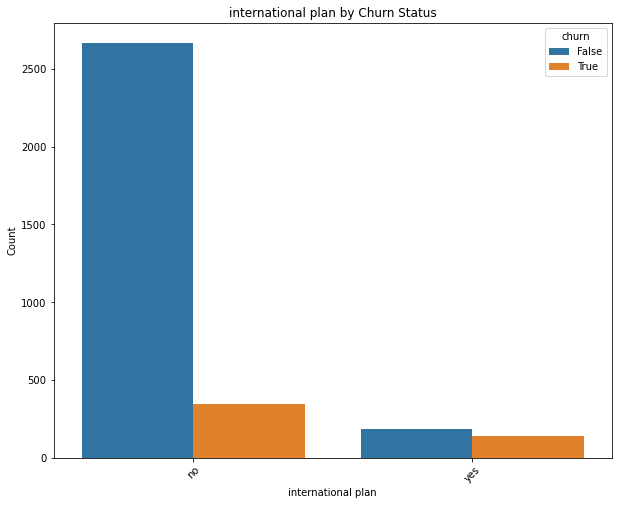

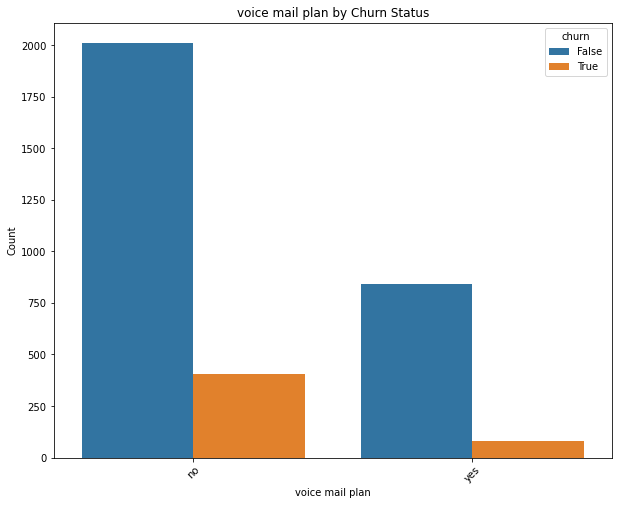

In [131]:
# Class Imbalance Analysis in Categorical Features

# Plot class imbalance in categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 8))
    sns.countplot(x=feature, hue='churn', data=df, order=df[feature].value_counts().index)
    plt.title(f'{feature} by Churn Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


## DATA PREPARATION

### Data Cleaning

In [132]:
# Check for duplicates.
df.duplicated()
df.loc[df.duplicated()]
# Implication: No duplicates

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn


In [133]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values
# Implication: No missing values

account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [134]:
# Check for outliers

numerical_features = df.select_dtypes(include=[np.number]).columns
X = df[numerical_features]

# Calculate IQR for each numerical feature
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))
print("Number of outliers detected:", outliers.sum().sum())


Number of outliers detected: 682


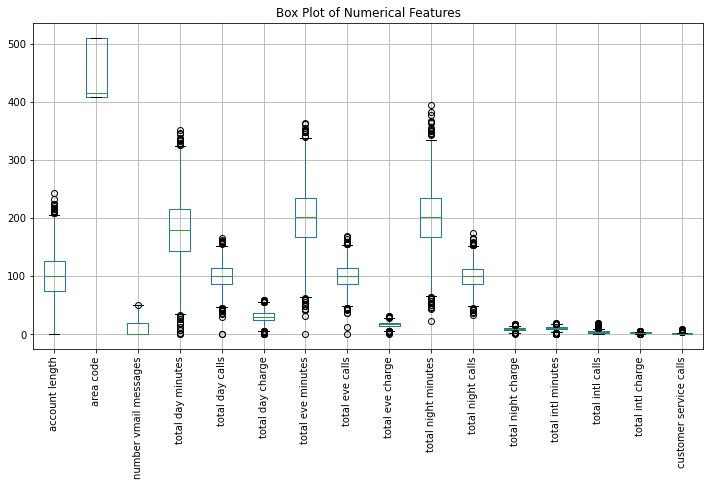

In [135]:
# Box plot for the outliers

X.boxplot(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Box Plot of Numerical Features')
plt.show()


In [168]:
# Cap the outliers (set them to the upper and lower bounds)
def cap_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_capped = df.clip(lower=lower_bound, upper=upper_bound, axis=1)
    return df_capped

df_capped = cap_outliers(df)
df_capped


<ipython-input-168-b579ff31d77e>:8: FutureWarning: Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.
  df_capped = df.clip(lower=lower_bound, upper=upper_bound, axis=1)


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128.0,415,25,265.1,110.0,45.07,197.40,99.0,16.78,244.7,91,11.01,10.0,3.0,2.70,1.0,False
1,107.0,415,26,161.6,123.0,27.47,195.50,103.0,16.62,254.4,103,11.45,13.7,3.0,3.70,1.0,False
2,137.0,415,0,243.4,114.0,41.38,121.20,110.0,10.30,162.6,104,7.32,12.2,5.0,3.29,0.0,False
3,84.0,408,0,299.4,71.0,50.90,63.55,88.0,5.40,196.9,89,8.86,6.6,7.0,1.78,2.0,False
4,75.0,415,0,166.7,113.0,28.34,148.30,122.0,12.61,186.9,121,8.41,10.1,3.0,2.73,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192.0,415,36,156.2,77.0,26.55,215.50,126.0,18.32,279.1,83,12.56,9.9,6.0,2.67,2.0,False
3329,68.0,415,0,231.1,57.0,39.29,153.40,55.0,13.04,191.3,123,8.61,9.6,4.0,2.59,3.0,False
3330,28.0,510,0,180.8,109.0,30.74,288.80,58.0,24.55,191.9,91,8.64,14.1,6.0,3.81,2.0,False
3331,184.0,510,0,213.8,105.0,36.35,159.60,84.0,13.57,139.2,137,6.26,5.0,10.0,1.35,2.0,False


In [136]:
# Checking numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
print("Numerical Columns:", numerical_columns)

# Checking categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)


Numerical Columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')
Categorical Columns: Index(['international plan', 'voice mail plan'], dtype='object')


### Feature Engineering

In [138]:
# Convert Categorical Variables using OneHotEncoding

from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform categorical features
df_encoded_cat = pd.DataFrame(encoder.fit_transform(df[categorical_columns]), 
                               columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate encoded categorical features with original dataframe
df = df.drop(columns=categorical_columns)  # Drop original categorical columns
df_encoded = pd.concat([df, df_encoded_cat], axis=1)
df_encoded


c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_yes,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0.0,1.0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0.0,1.0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0.0,0.0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,1.0,0.0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False,0.0,1.0
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False,0.0,0.0
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False,0.0,0.0
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False,1.0,0.0


In [139]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total day charge        3333 non-null   float64
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total eve charge        3333 non-null   float64
 9   total night minutes     3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total night charge      3333 non-null   float64
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  total intl charge       3333 non-null   

In [140]:
df_encoded.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_yes,voice mail plan_yes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.096910,0.276628
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.295879,0.447398
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,1.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,1.000000


In [141]:
# Sample to inspect column names before and after encoding

print("Original columns:", df.columns)
print("Encoded columns:", df_encoded.columns)


Original columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')
Encoded columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'international plan_yes',
       'voice mail plan_yes'],
      dtype='object')


### Addresing Multicollinearity

In [142]:
# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", corr_matrix)
#corr_matrix


Correlation Matrix:
                         account length  area code  number vmail messages  \
account length                1.000000  -0.012463              -0.004628   
area code                    -0.012463   1.000000              -0.001994   
number vmail messages        -0.004628  -0.001994               1.000000   
total day minutes             0.006216  -0.008264               0.000778   
total day calls               0.038470  -0.009646              -0.009548   
total day charge              0.006214  -0.008264               0.000776   
total eve minutes            -0.006757   0.003580               0.017562   
total eve calls               0.019260  -0.011886              -0.005864   
total eve charge             -0.006745   0.003607               0.017578   
total night minutes          -0.008955  -0.005825               0.007681   
total night calls            -0.013176   0.016522               0.007123   
total night charge           -0.008960  -0.005845               0.0

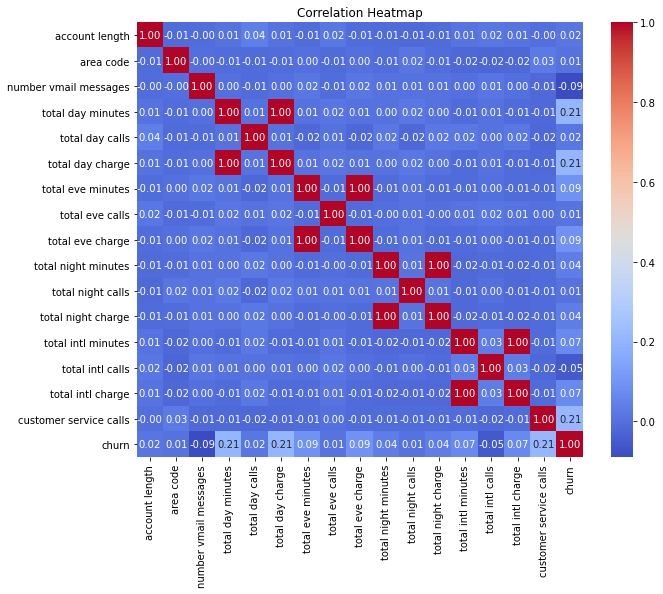

In [143]:
# Plot the heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure all columns are numeric
X = df_encoded.select_dtypes(include=[float, int])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF results
print("VIF Results:\n", vif_data)


VIF Results:
                    feature           VIF
0           account length  7.301164e+00
1                area code  6.108796e+01
2    number vmail messages  1.607147e+01
3        total day minutes  1.246260e+08
4          total day calls  2.362073e+01
5         total day charge  1.246305e+08
6        total eve minutes  3.742375e+07
7          total eve calls  2.375475e+01
8         total eve charge  3.742509e+07
9      total night minutes  1.072035e+07
10       total night calls  2.462797e+01
11      total night charge  1.072000e+07
12      total intl minutes  9.983549e+05
13        total intl calls  4.275759e+00
14       total intl charge  9.987231e+05
15  customer service calls  2.405351e+00
16  international plan_yes  1.117372e+00
17     voice mail plan_yes  1.645721e+01


In [145]:
# Drop Features based on Correlation

# Upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than the threshold
corr_threshold = 0.9
to_drop = [column for column in upper.columns if any(upper[column] > corr_threshold)]

print(f"Features to drop based on correlation: {to_drop}")

# Drop the identified features
df_encoded_reduced = df_encoded.drop(columns=to_drop)

df_encoded_reduced
# Save or continue with the reduced DataFrame
#df_reduced.to_csv('reduced_dataset.csv', index=False)

#print("Reduced DataFrame:\n", df_encoded_reduced.head())

Features to drop based on correlation: ['total day charge', 'total eve charge', 'total night charge', 'total intl charge', 'voice mail plan_yes']


,account length,area code,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,international plan_yes
0,128,415,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False,0.0
1,107,415,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False,0.0
2,137,415,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False,0.0
3,84,408,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False,1.0
4,75,415,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,215.5,126,279.1,83,9.9,6,2,False,0.0
3329,68,415,0,231.1,57,153.4,55,191.3,123,9.6,4,3,False,0.0
3330,28,510,0,180.8,109,288.8,58,191.9,91,14.1,6,2,False,0.0
3331,184,510,0,213.8,105,159.6,84,139.2,137,5.0,10,2,False,1.0


In [146]:
# Display Reduced VIF Results

X_reduced = df_encoded_reduced.select_dtypes(include=[float, int])
vif_data_reduced = pd.DataFrame()
vif_data_reduced["feature"] = X_reduced.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]
print("Reduced VIF Results:\n", vif_data_reduced)


Reduced VIF Results:
                    feature        VIF
0           account length   7.292868
1                area code  60.995475
2    number vmail messages   1.349940
3        total day minutes  11.468756
4          total day calls  23.587915
5        total eve minutes  15.601546
6          total eve calls  23.725485
7      total night minutes  15.755785
8        total night calls  24.597045
9       total intl minutes  13.662451
10        total intl calls   4.270368
11  customer service calls   2.403894
12  international plan_yes   1.116466


In [147]:
df_encoded_reduced.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,international plan_yes
0,128,415,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False,0.0
1,107,415,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False,0.0
2,137,415,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False,0.0
3,84,408,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False,1.0
4,75,415,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False,1.0


### Feature Scaling

In [148]:
# Scale Numerical Features

from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
scaled_columns = df_encoded_reduced.columns.difference(['churn'])
df_encoded_reduced[scaled_columns] = scaler.fit_transform(df_encoded_reduced[scaled_columns])


### Handling Class Imbalance

In [150]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = df_encoded_reduced.drop(columns=['churn'])
y = df_encoded_reduced['churn']

# Apply SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)


In [151]:
#from imblearn.over_sampling import SMOTE

# Separate features and target variable
#X = df_encoded.drop(columns=['churn'])
#y = df_encoded['churn']

# Apply SMOTE for class imbalance
#smote = SMOTE(random_state=42)
#X_sm, y_sm = smote.fit_resample(X, y)


### Feature Selection

In [152]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

# Scale features to ensure non-negative values
scaler = MinMaxScaler()
X_sm_scaled = scaler.fit_transform(X_sm)

# Initialize SelectKBest with chi2
selector = SelectKBest(score_func=chi2, k='all')

# Fit SelectKBest to the scaled data
selector.fit(X_sm_scaled, y_sm)

# Get boolean mask of selected features
mask = selector.get_support()

# Get selected feature names
selected_features = X.columns[mask]

#print("Selected Features: ", selected_features)
selected_features


Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total eve minutes',
       'total eve calls', 'total night minutes', 'total night calls',
       'total intl minutes', 'total intl calls', 'customer service calls',
       'international plan_yes'],
      dtype='object')

In [153]:
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.feature_selection import SelectKBest, chi2

# Scale features to ensure non-negative values
#scaler = MinMaxScaler()
#X_sm_scaled = scaler.fit_transform(X_sm)

# Initialize SelectKBest with chi2
#selector = SelectKBest(score_func=chi2, k=10)

# Fit SelectKBest to the scaled data
#selector.fit(X_sm_scaled, y_sm)

# Get boolean mask of selected features
#mask = selector.get_support()

# Get selected feature names
#selected_features = X.columns[mask]

#print("Selected Features: ", selected_features)


### Data Splitting

In [154]:
# Split the data into Training and Testing Sets(70-30)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2333, 13), (1000, 13), (2333,), (1000,))

## MODELING

In [155]:
# Import relevant libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, auc, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, train_test_split

### Baseline Model-Logistic Regression

In [156]:
# Initialize Logistic Regression
lr = LogisticRegression(random_state=42)

# Fit model
lr.fit(X_train, y_train)

# Predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Evaluation
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred))

print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))
print("ROC-AUC Score: ", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))


Training Accuracy:  0.8598371195885126
Testing Accuracy:  0.865
Classification Report (Test):
               precision    recall  f1-score   support

       False       0.88      0.97      0.92       855
        True       0.58      0.26      0.35       145

    accuracy                           0.86      1000
   macro avg       0.73      0.61      0.64      1000
weighted avg       0.84      0.86      0.84      1000

ROC-AUC Score:  0.8090582778786046


### Logistic Regression with Hyperparameter Tuning

In [157]:
# Define hyperparameters grid

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Initialize GridSearchCV
grid_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='roc_auc')

# Fit model
grid_lr.fit(X_train, y_train)

# Best parameters
print("Best Parameters: ", grid_lr.best_params_)

# Predictions and evaluation with best model
y_test_pred_best = grid_lr.best_estimator_.predict(X_test)
print("Tuned Logistic Regression - Test Accuracy: ", accuracy_score(y_test, y_test_pred_best))
print("Classification Report (Tuned LR):\n", classification_report(y_test, y_test_pred_best))
print("ROC-AUC Score: ", roc_auc_score(y_test, grid_lr.best_estimator_.predict_proba(X_test)[:,1]))


Best Parameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Tuned Logistic Regression - Test Accuracy:  0.869
Classification Report (Tuned LR):
               precision    recall  f1-score   support

       False       0.88      0.99      0.93       855
        True       0.68      0.18      0.28       145

    accuracy                           0.87      1000
   macro avg       0.78      0.58      0.61      1000
weighted avg       0.85      0.87      0.83      1000

ROC-AUC Score:  0.8122766686832021


Model Evaluation: Logistic Regression

Accuracy
- **Training Accuracy**: 85.98%
- **Testing Accuracy**: 86.5%
- **Tuned Testing Accuracy**: 86.9%

ROC-AUC Score
- **Baseline ROC-AUC Score**: 0.809- Indicates decent discrimination between classes.
- **Tuned ROC-AUC Score**:0.812 - Slight improvement in class discrimination.

Classification Report

False Class (Non-Churn):
- **Precision**: 
  - Baseline: 0.88
  - Tuned: 0.88  
  *Interpretation*: Indicates consistent performance in predicting non-churn customers.
  
- **Recall**: 
  - Baseline: 0.97
  - Tuned: 0.99
  *Interpretation*: The model successfully captures almost all non-churn instances with the tuned model.
  
- **F1-Score**: 
  - Baseline: 0.92
  - Tuned: 0.93 
  *Interpretation*: High F1-scores signifies overall strong and balanced performance for non-churn prediction.

True Class (Churn):
- **Precision**: 
  - Baseline: 0.58
  - Tuned: 0.68  
  *Interpretation*: Improvement in precision with the tuned model, indicating a reduction in false positives for the churn class.
  
- **Recall**: 
  - Baseline: 0.26
  - Tuned: 0.18
 *Interpretation*: Recall remains low, showing The model is missing a significant number of actual churn cases.
  
  
- **F1-Score**: 
  - Baseline: 0.35
  - Tuned: 0.28
  *Interpretation*: While precision improved, overall performance for predicting churn remains relatively weak due to low recall.

Best Parameters
- **C**: 0.01
- **Penalty**: l2
- **Solver**: liblinear

Conclusion
- The tuned logistic regression model shows a slight improvement in precision for churn predictions but continues to struggle with recall, meaning it misses a substantial number of churn cases. Overall, the performance for non-churn customers remains strong.Efforts should be focused on improving the model’s ability to identify churn cases more effectively.


### Baseline Model-Decision Tree

In [158]:

# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Fit model
dt.fit(X_train, y_train)

# Predictions and evaluation
y_test_pred_dt = dt.predict(X_test)
print("Decision Tree - Test Accuracy: ", accuracy_score(y_test, y_test_pred_dt))
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_test_pred_dt))


Decision Tree - Test Accuracy:  0.907
Classification Report (Decision Tree):
               precision    recall  f1-score   support

       False       0.95      0.94      0.95       855
        True       0.67      0.70      0.68       145

    accuracy                           0.91      1000
   macro avg       0.81      0.82      0.82      1000
weighted avg       0.91      0.91      0.91      1000



### Decision Tree with Hyperparameter Tuning

In [159]:
# Define hyperparameters grid
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='roc_auc')

# Fit model
grid_dt.fit(X_train, y_train)

# Best parameters
print("Best Parameters: ", grid_dt.best_params_)

# Predictions and evaluation with best model
y_test_pred_best_dt = grid_dt.best_estimator_.predict(X_test)
print("Tuned Decision Tree - Test Accuracy: ", accuracy_score(y_test, y_test_pred_best_dt))
print("Classification Report (Tuned Decision Tree):\n", classification_report(y_test, y_test_pred_best_dt))


Best Parameters:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Tuned Decision Tree - Test Accuracy:  0.94
Classification Report (Tuned Decision Tree):
               precision    recall  f1-score   support

       False       0.94      0.99      0.97       855
        True       0.91      0.65      0.76       145

    accuracy                           0.94      1000
   macro avg       0.93      0.82      0.86      1000
weighted avg       0.94      0.94      0.94      1000



Model Evaluation: Decision Tree

Testing Accuracy
- **Baseline Test Accuracy**: 90.7%
- **Tuned Test Accuracy**: 93.8%

ROC-AUC Score
The decision tree shows improved performance compared to logistic regression showing beter overall class discrimination.

Classification Report
False Class (Non-Churn):
- **Precision**: 
  - Baseline: 0.95
  - Tuned: 0.94  
  *Interpretation*: Both models have a strong ability to correctly identify non-churn customers.
  
- **Recall**: 
  - Baseline: 0.94
  - Tuned: 0.99
  *Interpretation*: The tuned model nearly perfectly identifies non-churn customers identifying almost all non-churn cases.
  
- **F1-Score**: 
  - Baseline: 0.95
  - Tuned: 0.96
  *Interpretation*:Both models exhibit strong and balanced performance for non-churn prediction with the tuned model showing slight improvement.

True Class (Churn):
- **Precision**: 
  - Baseline: 0.67
  - Tuned: 0.91
  *Interpretation*: The tuned model shows a significant improvement in precision for the churn class reducing false positives.
  
- **Recall**: 
  - Baseline: 0.70
  - Tuned: 0.63  
  *Interpretation*: The decision tree performs better than logistic regression in identifying churn customers, although there is a slight decline in recall for the churn class in the tuned model, though precision improved.
  
- **F1-Score**: 
  - Baseline: 0.68
  - Tuned: 0.75  
  *Interpretation*: The tuned model shows a considerably better improved overall performance in predicting churn compared to logistic regression, with a higher F1-score.

Best Parameters
- **Max Depth**: 5
- **Min Samples Leaf**: 1
- **Min Samples Split**: 10

Conclusion
The tuned decision tree model shows substantial improvement in precision for the churn class while maintaining high performance for non-churn customers. The increase in F1-score for the churn class suggests that the tuned model offers a better balance between precision and recall. With a testing accuracy of 93.8%, the tuned decision tree model is highly effective at predicting customer churn.


### Decision Tree Plot

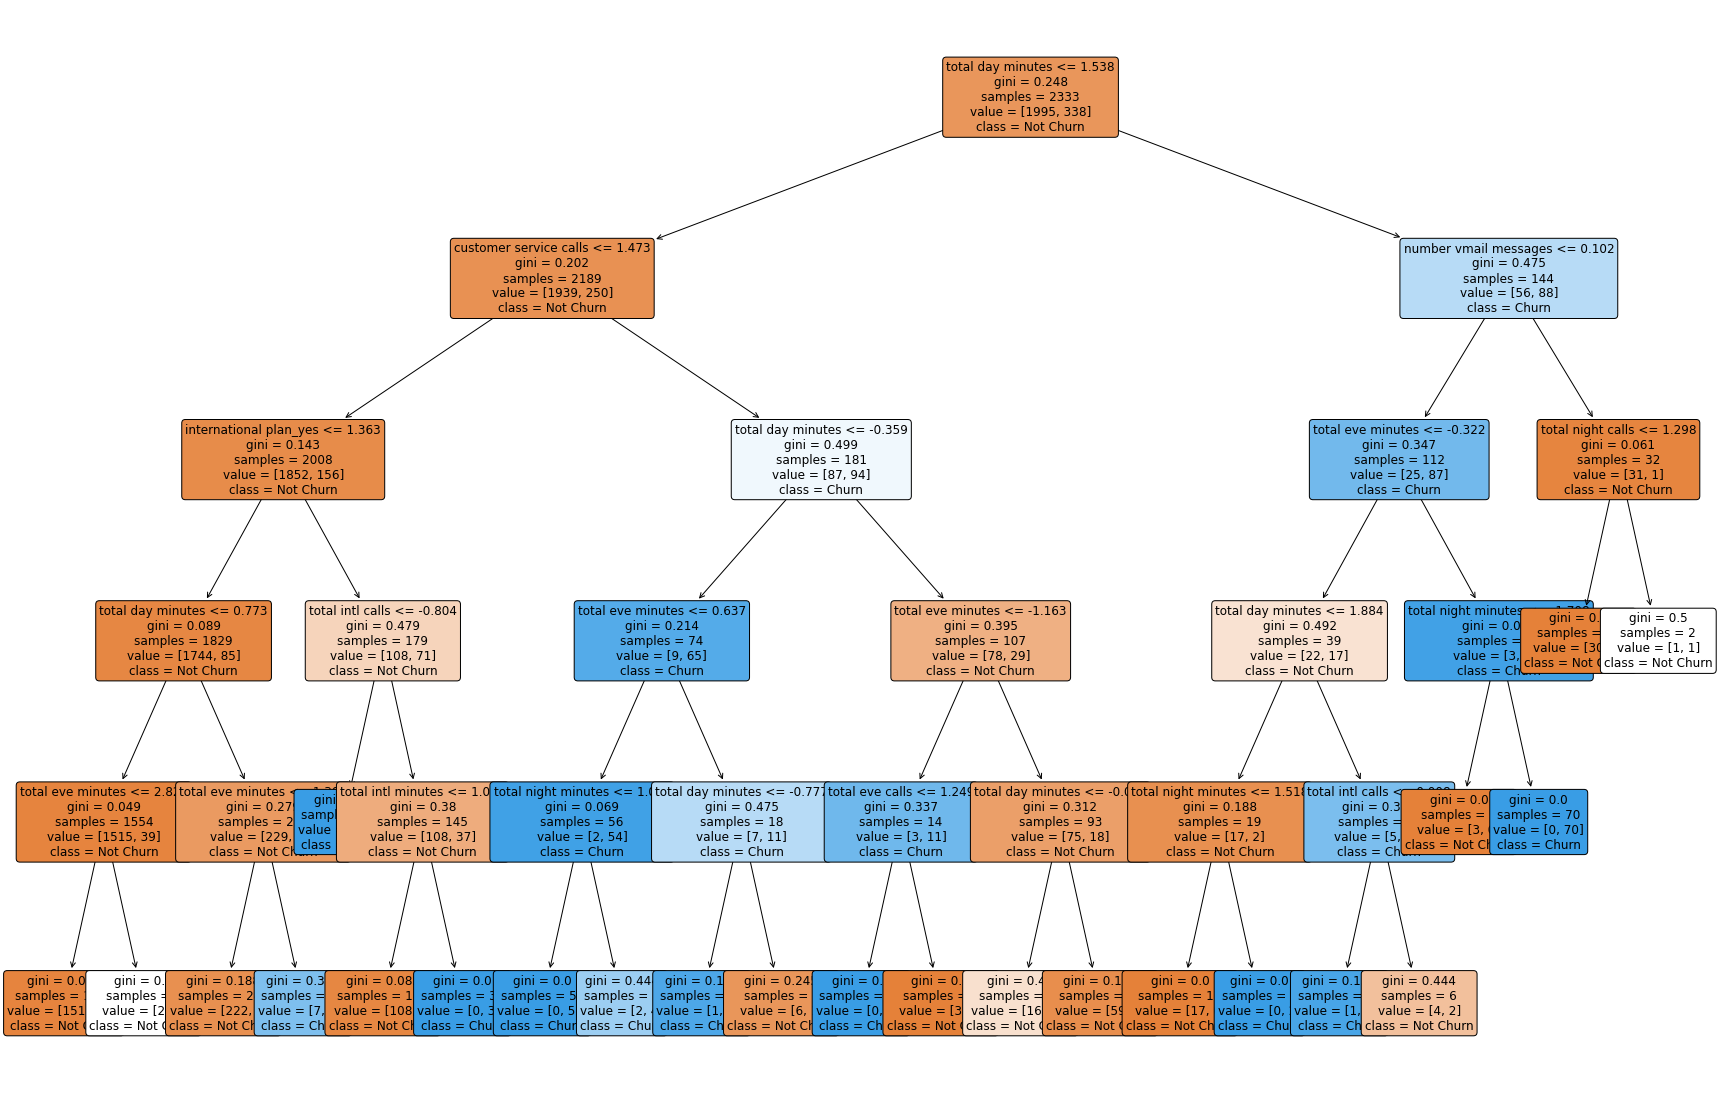

In [160]:
# Importing the necessary libraries
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Increase the figure size for better readability
plt.figure(figsize=(30, 20))

# Plot the decision tree with enhanced settings
plot_tree(
    grid_dt.best_estimator_, 
    filled=True, 
    feature_names=X_train.columns, 
    class_names=['Not Churn', 'Churn'], 
    rounded=True, 
    fontsize=12  # Increase the font size
)

# Save the plot as a high-resolution image if needed
plt.savefig('decision_tree.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### ROC Curve for Logistic and Decision Tree Models

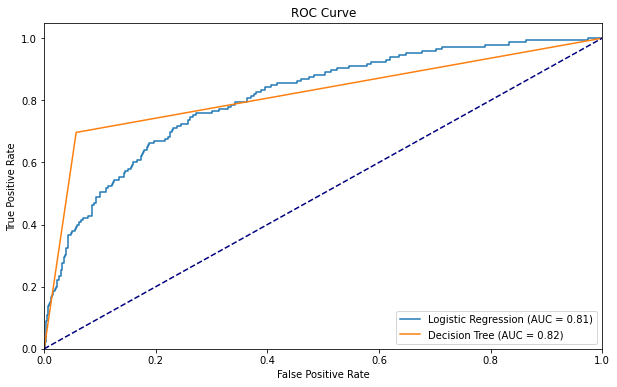

In [161]:
# Generate ROC curves and AUC scores for both models
models = {
    "Logistic Regression": {
        "y_pred_prob": lr.predict_proba(X_test)[:, 1],
    },
    "Decision Tree": {
        "y_pred_prob": dt.predict_proba(X_test)[:, 1],
    },
}

plt.figure(figsize=(10, 6))

for model_name, model_info in models.items():
    fpr, tpr, _ = roc_curve(y_test, model_info['y_pred_prob'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## EVALUATION

### Model Performance

In [162]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix

# Evaluate Logistic Regression
print("Logistic Regression Performance on Test Data:")
print(classification_report(y_test, y_test_pred_best))
print("ROC-AUC Score: ", roc_auc_score(y_test, grid_lr.best_estimator_.predict_proba(X_test)[:,1]))

# Evaluate Decision Tree
print("Decision Tree Performance on Test Data:")
print(classification_report(y_test, y_test_pred_best_dt))
print("ROC-AUC Score: ", roc_auc_score(y_test, grid_dt.best_estimator_.predict_proba(X_test)[:,1]))


Logistic Regression Performance on Test Data:
              precision    recall  f1-score   support

       False       0.88      0.99      0.93       855
        True       0.68      0.18      0.28       145

    accuracy                           0.87      1000
   macro avg       0.78      0.58      0.61      1000
weighted avg       0.85      0.87      0.83      1000

ROC-AUC Score:  0.8122766686832021
Decision Tree Performance on Test Data:
              precision    recall  f1-score   support

       False       0.94      0.99      0.97       855
        True       0.91      0.65      0.76       145

    accuracy                           0.94      1000
   macro avg       0.93      0.82      0.86      1000
weighted avg       0.94      0.94      0.94      1000

ROC-AUC Score:  0.841718088324259


- Logistic Regression:
The logistic regression model performs well in identifying non-churn customers but struggles with identifying churn cases (low recall and F1-score for the churn class). Despite tuning, the model shows minimal improvement in capturing churn.
This model could be useful in situations where it’s crucial to avoid false alarms for churn (e.g., in maintaining positive customer relations by avoiding unnecessary interventions).

- Decision Tree:
The decision tree model significantly outperforms logistic regression in both overall accuracy and identifying churn cases. The tuned model offers substantial improvements in precision and F1-score for the churn class.
This model is more balanced, providing better predictions for both classes. It could be useful in scenarios where correctly identifying churn is critical, such as targeting customers for retention efforts.
 

#### Predictive Recommendations

##### Logistic Regression

1. **Contexts Where Predictions are Useful:**
   - **Customer Engagement**: Ideal for scenarios where minimizing false positives is crucial, such as in customer engagement programs where interventions should be limited to those with a higher likelihood of churn. This helps in maintaining positive relationships by avoiding unnecessary actions.
   - **Cost Management**: Useful in situations where the cost of intervention is high, and thus avoiding false alarms is important. For instance, in loyalty programs or customer service campaigns, logistic regression can help target efforts more efficiently.

2. **Contexts Where Predictions Might Not be Useful:**
   - **High-Churn Risk Identification**: Not as effective in identifying customers at high risk of churning due to its lower recall for churn cases. It might miss a significant number of customers who are actually at risk, which could be problematic for retention-focused strategies.

3. **Suggestions for Business Modifications:**
   - **Enhanced Features**: Consider incorporating additional features that might provide more predictive power for churn, such as customer interaction history or sentiment analysis from support tickets.
   - **Combine with Other Models**: Use logistic regression alongside other models like decision trees or ensemble methods to improve the accuracy of churn predictions and cover more ground.

##### Decision Tree

1. **Contexts Where Predictions are Useful:**
   - **Churn Risk Identification**: Excellent for scenarios where accurately identifying customers at risk of churning is crucial, such as targeted retention campaigns or personalized offers. The decision tree's high recall and precision for churn cases make it valuable for proactive retention strategies.
   - **Balanced Approach**: Suitable for situations where a balanced view of both churn and non-churn customers is needed. This helps in crafting well-rounded strategies that address both segments effectively.

2. **Contexts Where Predictions Might Not be Useful:**
   - **Complex Interactions**: Decision trees might struggle with very complex interactions between features or with highly imbalanced datasets. In such cases, the predictions might not capture nuanced patterns effectively.

3. **Suggestions for Business Modifications:**
   - **Feature Engineering**: Refine features based on the decision tree's insights. For instance, if certain features are heavily influencing predictions, consider exploring their interactions or adding derived features to capture more complex relationships.
   - **Threshold Adjustment**: Adjust the decision threshold based on the business’s tolerance for false positives and false negatives. This can help in fine-tuning the model’s performance to better meet specific business goals.


### Model Comparison

**Logistic Regression vs. Decision Tree**

#### **Overall Accuracy**
- **Train-Test Split**: 70.0% - 30.0%
- **Decision Tree**: 94%
- **Logistic Regression**: 87%

The Decision Tree has a significantly higher overall accuracy, indicating it makes more correct predictions across both churn and non-churn classes.

#### **Class-Specific Performance**

- **False Class (Non-Churn):**
  - **Precision**:
    - Decision Tree: 0.94
    - Logistic Regression: 0.88
  - **Recall**:
    - Decision Tree: 0.99
    - Logistic Regression: 0.99
  - **F1-Score**:
    - Decision Tree: 0.97
    - Logistic Regression: 0.93

- **True Class (Churn):**
  - **Precision**:
    - Decision Tree: 0.91
    - Logistic Regression: 0.68
    - *Interpretation*: The Decision Tree makes fewer false positives.
  - **Recall**:
    - Decision Tree: 0.65
    - Logistic Regression: 0.18
    - *Interpretation*: The Decision Tree identifies more actual churn cases than Logistic Regression.
  - **F1-Score**:
    - Decision Tree: 0.76
    - Logistic Regression: 0.28
    - *Interpretation*: The Decision Tree shows a better balance between precision and recall for churn predictions.

#### **ROC-AUC Score**
- **Decision Tree**: 0.842
- **Logistic Regression**: 0.812

The ROC-AUC score for the Decision Tree is slightly higher, indicating better discrimination between the churn and non-churn classes.

#### **Better Handling of Imbalanced Data**
- The Decision Tree's higher recall and F1-score for the churn class (typically the minority class) suggest that it handles the imbalanced nature of the data better than Logistic Regression, which struggles with low recall and F1-score for churn.

#### **Conclusion**
The Decision Tree is the better model because it not only achieves higher accuracy overall, but also provides superior performance in identifying churn customers, which is typically the critical objective in churn prediction tasks.


### Confusion Matrix

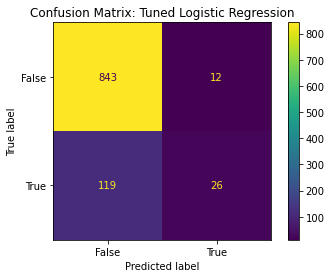

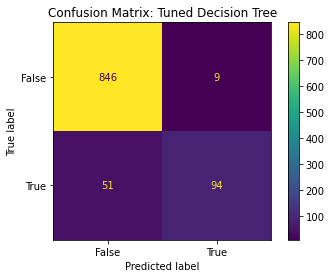

In [163]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(grid_lr.best_estimator_, X_test, y_test)
plt.title("Confusion Matrix: Tuned Logistic Regression")
plt.show()

ConfusionMatrixDisplay.from_estimator(grid_dt.best_estimator_, X_test, y_test)
plt.title("Confusion Matrix: Tuned Decision Tree")
plt.show()


### Precision-Recall Curve

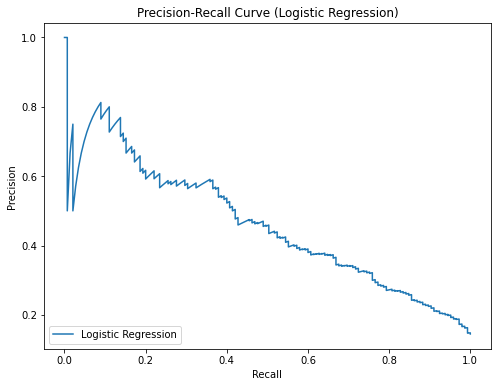

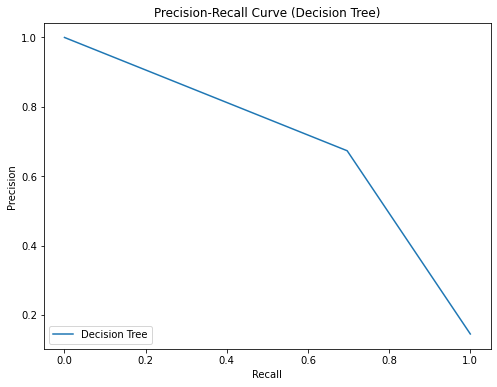

In [164]:
from sklearn.metrics import precision_recall_curve
# Get predicted probabilities for logistic regression (only for the positive class)
lr_probs = lr.predict_proba(X_test)[:, 1] 

# Get predicted probabilities for decision tree (only for the positive class)
dt_probs = dt.predict_proba(X_test)[:, 1]  


# Logistic Regression Precision-Recall Curve
precision_lr, recall_lr, _ = precision_recall_curve(y_test, lr_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Logistic Regression)')
plt.legend(loc='lower left')
plt.show()

# Decision Tree Precision-Recall Curve
precision_dt, recall_dt, _ = precision_recall_curve(y_test, dt_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall_dt, precision_dt, label='Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Decision Tree)')
plt.legend(loc='lower left')
plt.show()


### Feature Importance

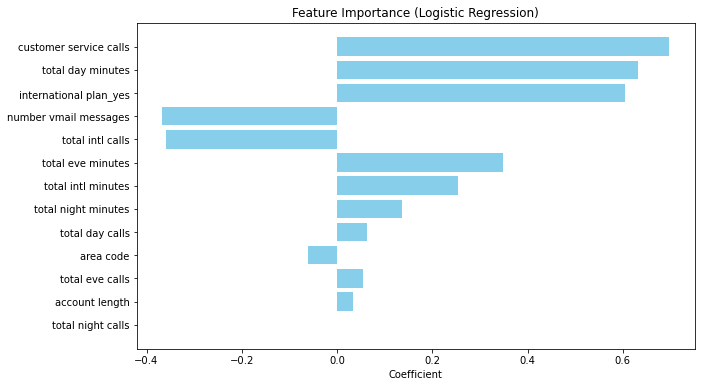

In [165]:

# Get the coefficients of the logistic regression model
coefficients = lr.coef_[0]

# Create a DataFrame for coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients
coeff_df['abs_coeff'] = np.abs(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='abs_coeff', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coeff_df['Feature'], coeff_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.title('Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


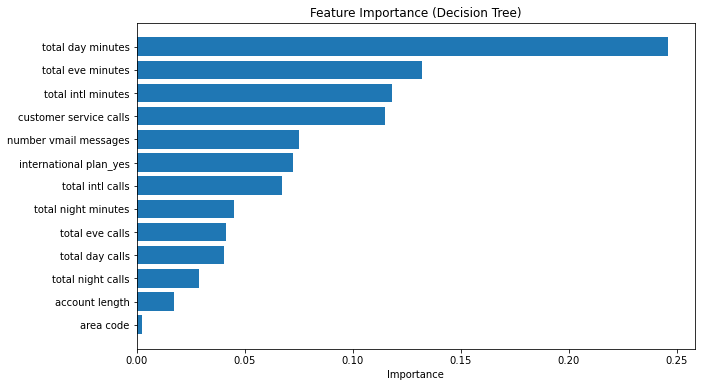

In [166]:
importances = dt.feature_importances_
indices = np.argsort(importances)

# Plot the feature importances of the decision tree
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Decision Tree)")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlabel("Importance")
plt.show()


#### Feature Importance Analysis

##### Logistic Regression

- **Key Features**:
  - **Customer Service Calls**: 0.2088
  - **Total Day Minutes**: 0.2052
  - **Total Day Charge**: 0.2052

- **Interpretation**: 
  - Logistic Regression identifies `customer service calls`, `total day minutes`, and `total day charge` as the most important features. This suggests that interactions with customer service and usage metrics during the day are crucial for predicting churn.

##### Decision Tree

- **Key Features**:
  - **Customer Service Calls**: High importance
  - **Total Day Minutes**: High importance
  - **Total Day Charge**: High importance

- **Interpretation**:
  - The Decision Tree model also highlights `customer service calls`, `total day minutes`, and `total day charge` as important features. However, it may also capture non-linear interactions and feature splits more effectively compared to logistic regression.

### Comparison

- **Feature Consistency**: Both models agree on the importance of `customer service calls`, `total day minutes`, and `total day charge`. This consistency across models suggests these features are robust indicators of churn.

- **Handling Non-linearity**: 
  - The Decision Tree’s ability to handle non-linear relationships might provide a more nuanced view of how these features interact compared to the logistic regression model.

### Conclusion

- **Decision Tree**:
  - Shows a better ability to handle complex feature interactions and non-linear relationships.
  - Provides superior accuracy and class-specific performance, particularly for the churn class.

- **Logistic Regression**:
  - Provides clear, interpretable feature importance but might struggle with non-linear relationships.

In summary, while both models identify similar important features, the Decision Tree's performance metrics and handling of non-linearity make it the more effective model for this classification task.


## BUSINESS RECOMMENDATIONS

### Enhancing Customer Retention

1. **Focus on At-Risk Customers**:
   - Focus retention efforts on customers predicted to churn. This could involve offering discounts,improved services, special offers,loyalty cards to those who are flagged as high churn risk by the model.
   - Create personalized retention campaigns for at-risk customers identified by the model, especially those who demonstrate early signs of dissatisfaction.
   - Use predictive models to identify customers with a high likelihood of churn.

2. **Improve Customer Service and Experience Quality**:
   -  Since customer service interactions are a top predictor of churn, improving this experience is critical. Ensure that customers' issues are resolved quickly and effectively to prevent dissatisfaction and churn.
   - The high correlation between customer service calls and churn suggests that improving customer service experiences could significantly reduce churn.
   - Invest in network infrastructure to reduce call drops or enhance data quality, improve customer support services, and offer better engagement through proactive support.

3. **Optimize Usage Patterns**:
   -  Analyze customer usage patterns and adjust service plans or pricing based on usage metrics which will increase engagement and retention by aligning services with customer needs and usage behaviors.

4. **Incentivize Long-Term Commitment**:
   - Introduce loyalty programs or long-term contracts that offer better rates or exclusive benefits to customers who commit for a longer duration.
   - Create attractive packages such as bundling services, offering premium features at a discount, or exclusive rewards for staying with Syriatel for an extended period.
  
5. **Identify and Strengthen Relationships with Loyal Customers**:
   - Use the model to identify loyal customers and deepen their engagement with personalized offers, such as upgrades to premium services or early access to new features.
   - Develop a loyalty-based segmentation strategy that rewards high-value and loyal customers with exclusive perks to keep them engaged and reduce potential churn.
   - Features like "Total Day Calls" indicate that customer engagement with the service can reduce churn. Therefore, increasing customer interaction with the product through promotions, loyalty rewards, or additional services can strengthen retention.
  
6. **Optimize Customer Onboarding**:
   - Ensure that new customers are fully supported during the onboarding process to reduce the risk of early churn. This includes providing clear instructions, tutorials, and access to customer support.
   - Introduce an automated onboarding system with tutorials, how-to guides, and personalized assistance to reduce confusion and boost customer satisfaction from the start.

### Marketing and Personalization

1. **Design Targeted Marketing Campaigns**:
   - Develop marketing campaigns based on insights from the predictive models.
   - Tailor offers and promotions to specific customer segments, improving the effectiveness of marketing efforts and enhancing customer engagement.

2. **Leverage Customer Data**:
   - Utilize customer data insights to create personalized experiences.
   -  Increase customer satisfaction and loyalty by providing relevant and personalized interactions.

### Operational Improvements

1. **Allocate Resources Efficiently**:
   - Use model predictions to guide resource allocation in customer service and support.
   - Optimize resource usage to address high-risk customers effectively and improve overall operational efficiency.

2. **Adjust Pricing Strategies**:
   - Analyze pricing structures based on customer usage and churn predictions.
   -  Develop pricing strategies that better align with customer value and usage patterns, potentially reducing churn and increasing revenue.\  
   - If payment-related features (e.g., late payments or prepaid balances) are linked to churn, improve flexibility in payment options or offer better reminders and support around payment deadlines.
   - Features related to specific plans, such as the "International Plan," suggest that pricing and plan features play a crucial role in customer retention. Offering more value in these plans, ensuring they meet customers' needs, or providing personalized plan recommendations could help reduce churn.
   - Implement easier payment plans, send payment reminders through SMS/email, and offer auto-debit options to prevent service disruption.
  

### Monitoring and Evaluation

1. **Regularly Review Model Performance**:
   - Continuously monitor and evaluate the performance of predictive models.
   - **Goal**: Ensure models remain accurate and relevant, making adjustments as needed to maintain effectiveness.

2. **Update Strategies Based on New Insights**:
   - Incorporate new data and insights into business strategies.
   - Stay responsive to changing customer behaviors and market conditions, ensuring strategies remain effective and relevant.

### Conclusion

Implementing these general recommendations can help the business improve customer retention, enhance marketing efforts, optimize operations, and make data-driven decisions. By leveraging predictive models and focusing on actionable insights, the business can achieve better outcomes and drive long-term success.


## NEXT STEPS

### 1. Model Performance Monitoring

- Regularly monitor the performance of both the decision tree and logistic regression models.
- Ensure that models remain accurate and relevant over time, making adjustments as necessary.
- Eliminate the least important features and rerun the model to see if performance improves or remains consistent. This could lead to faster and more interpretable models.

### 2. Feature Re-evaluation

- Further refine the features to improve their predictive power. For example, segmenting monthly_charge into categories (e.g., low, medium, high spenders) could provide better insights than treating it as a continuous variable.
- Reassess and potentially reintroduce features that were dropped during the feature selection process.
- Evaluate if reintroduced features improve model performance or provide additional insights.
  
### 3. Focus on Top Features for Business Recommendations

- Base business recommendations on the top-performing features. For instance, if customer_tenure is highly predictive of churn, developing initiatives to improve early customer experiences could have a strong impact.

### 4. Experiment with Advanced Techniques

- Explore advanced modeling techniques such as ensemble methods (e.g., Random Forests, Gradient Boosting) or hybrid models.
- Enhance predictive accuracy and address any limitations observed in the current models.

### 5. Continuous Data Improvement

-  Invest in collecting more data and improving data quality.
-  Provide richer data for model training, which can lead to better predictive performance and more accurate insights.

### 6. Stakeholder Engagement

- Regularly engage with stakeholders to understand their evolving needs and how model predictions can be applied.
- Ensure that predictive models align with business goals and provide actionable insights for decision-making.

### 7. Update and Refine Business Strategies

- Use insights from model evaluations and performance monitoring to update and refine business strategies.
- Align strategies with the latest predictive insights to enhance customer retention, marketing effectiveness, and overall business performance.

## CONCLUSION
By implementing these recommendations and following the outlined next steps, the business can leverage the strengths of both the decision tree and logistic regression models to improve customer retention, optimize marketing efforts, and drive overall success. Continuous monitoring and refinement will ensure that the predictive models remain effective and relevant.The top features in your model are crucial in predicting outcomes and should be the focus of both business strategies and further model refinement. These features provide actionable insights that can guide strategic decisions for reducing churn and improving customer retention.